# 0. Init

Imports etc.

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from statsforecast import StatsForecast

In [2]:
# print matplotlib inline plots
%matplotlib inline

# 1. Preprocessing

In [3]:
df = pd.read_excel("data/data_v1.0.xlsx")
df2 = pd.read_excel("data/data_v2.0.xlsx")
df.head()

,time,power (W),voltage (V),amperage (A),generation (w),temperature (ºC)
0,00:05:00,1230,231,6.56,0,10.1
1,00:10:00,1223,230,6.55,0,10.1
2,00:15:00,1229,231,6.56,0,10.1
3,00:20:00,1218,231,6.54,0,10.0
4,00:25:00,1234,231,6.55,0,10.0


In [4]:
df2.head()

,time,power (W),voltage (V),amperage (A),generation (w),temperature (˚C)
0,00:05:00,973,232,5.82,0,7.9
1,00:10:00,973,232,5.81,0,7.9
2,00:15:00,969,232,5.81,0,7.8
3,00:20:00,972,232,5.82,0,7.9
4,00:25:00,974,232,5.82,0,7.8


In [5]:
# change time column to datetime, but there's no date so just the time
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S")
df2["time"] = pd.to_datetime(df2["time"], format="%H:%M:%S")
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   time              105120 non-null  datetime64[ns]
 1   power (W)         105120 non-null  int64         
 2   voltage (V)       105120 non-null  int64         
 3   amperage (A)      105120 non-null  float64       
 4   generation (w)    105120 non-null  int64         
 5   temperature (ºC)  105120 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 4.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              11520 non-null  datetime64[ns]
 1   power (W)         11520 non-null  int64         
 2   voltage (V)       11520 non-null  int64         
 3 

In [19]:
# concat the df2 to df and map the two temperature columns of which the name is slightly different to the same column
df2 = df2.rename(columns={"temperature (˚C)": "temperature (ºC)"})

df_combined = pd.concat([df, df2], ignore_index=True)

# replace the time column with a column that starts at 1900-01-01 and has a value for each 5 minutes
df_combined["time"] = pd.date_range(
    start="1900-01-01", periods=len(df_combined), freq="5min"
)

# print the first 5 rows of the df
df_combined.head()

# print the last 5 rows of the df
df_combined.tail()

,time,power (W),voltage (V),amperage (A),generation (w),temperature (ºC)
116635,1901-02-09 23:35:00,772,234,4.95,0,14.4
116636,1901-02-09 23:40:00,778,235,4.95,0,14.3
116637,1901-02-09 23:45:00,772,235,4.94,0,14.2
116638,1901-02-09 23:50:00,774,235,4.94,0,14.2
116639,1901-02-09 23:55:00,777,234,4.95,0,14.3


In [9]:
report = ProfileReport(df)

report.to_file("report3.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 60.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

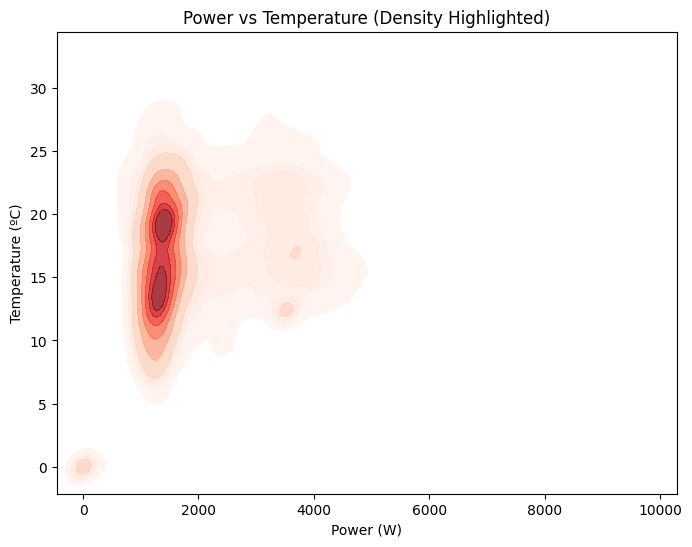

In [8]:
plt.figure(figsize=(8, 6))
# Use kdeplot to show density as a background
sns.kdeplot(
    data=df,
    x="power (W)",
    y="temperature (ºC)",
    fill=True,
    cmap="Reds",
    thresh=0.05,
    alpha=0.8,
)

plt.title("Power vs Temperature (Density Highlighted)")
plt.xlabel("Power (W)")
plt.ylabel("Temperature (ºC)")
plt.show()

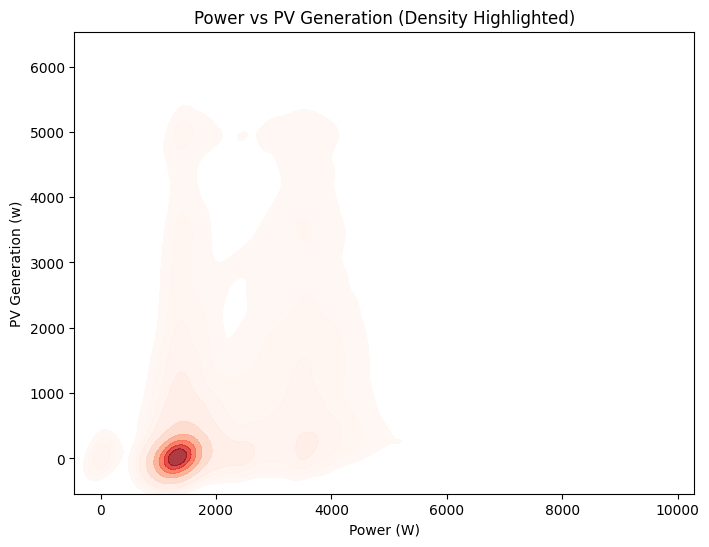

In [10]:
# twee stokstaartjes die kussen en handen vasthouden

plt.figure(figsize=(8, 6))
# Use kdeplot to show density
sns.kdeplot(
    data=df,
    x="power (W)",
    y="generation (w)",
    fill=True,
    cmap="Reds",
    thresh=0.05,
    alpha=0.8,
)

plt.title("Power vs PV Generation (Density Highlighted)")
plt.xlabel("Power (W)")
plt.ylabel("PV Generation (w)")
plt.show()

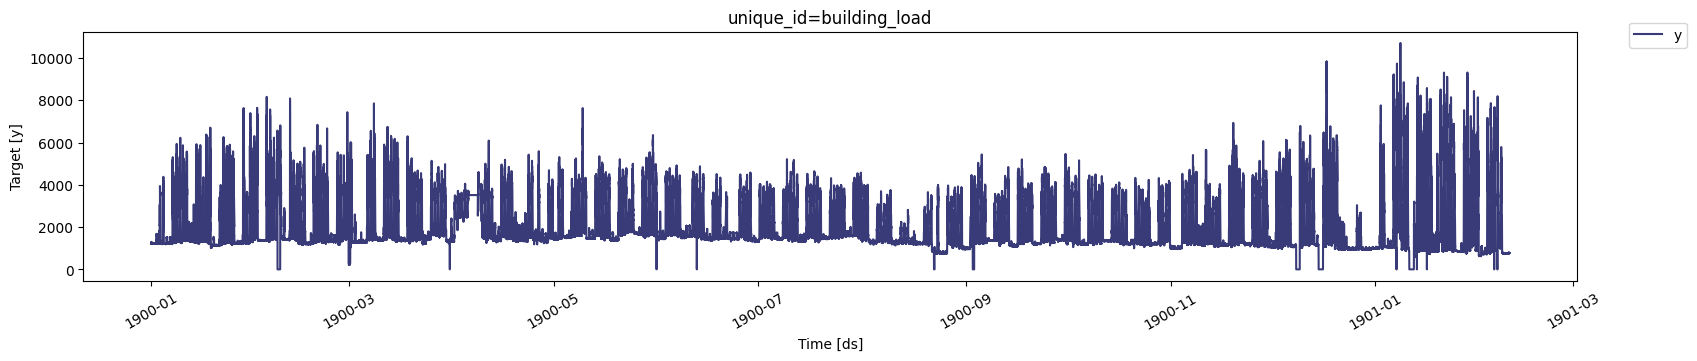

In [20]:
# rename column time to "ds", column power (W) to "y" and make new index column named "unique_id"
df_combined = df_combined.rename(columns={"time": "ds", "power (W)": "y"})
df_combined["unique_id"] = "building_load"

# plot the data

StatsForecast.plot(df_combined)

In [30]:
one_year_df = df_combined.iloc[: 12 * 24 * 365, :]
ts = pd.Series(one_year_df.y.values, index=one_year_df.ds)
ts

ds
1900-01-01 00:00:00    1230
1900-01-01 00:05:00    1223
1900-01-01 00:10:00    1229
1900-01-01 00:15:00    1218
1900-01-01 00:20:00    1234
                       ... 
1900-12-31 23:35:00     984
1900-12-31 23:40:00     977
1900-12-31 23:45:00     985
1900-12-31 23:50:00     973
1900-12-31 23:55:00     973
Length: 105120, dtype: int64

Text(0.5, 0, 'Time of Day')

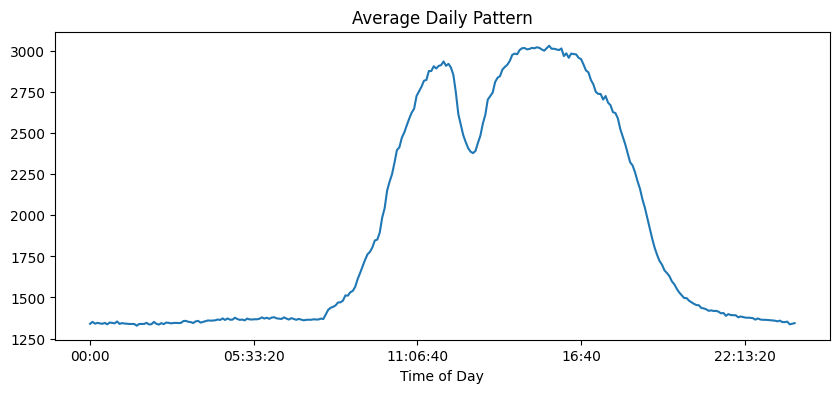

In [31]:
import matplotlib.pyplot as plt

ts_daily = ts.groupby(ts.index.time).mean()
ts_daily.plot(figsize=(10, 4), title="Average Daily Pattern")
plt.xlabel("Time of Day")

Text(0.5, 0, 'Day of Week (0=Monday)')

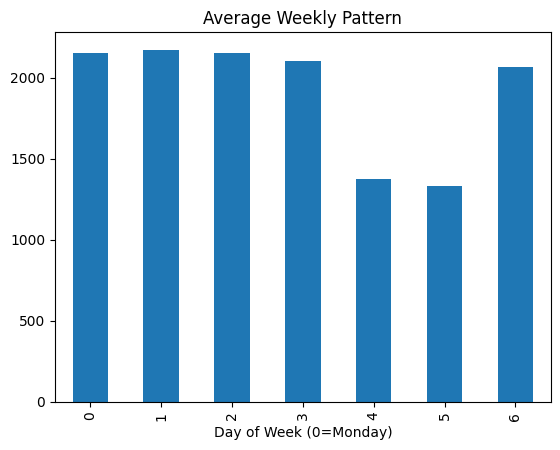

In [32]:
ts_weekly = ts.groupby(ts.index.dayofweek).mean()
ts_weekly.plot(kind="bar", title="Average Weekly Pattern")
plt.xlabel("Day of Week (0=Monday)")

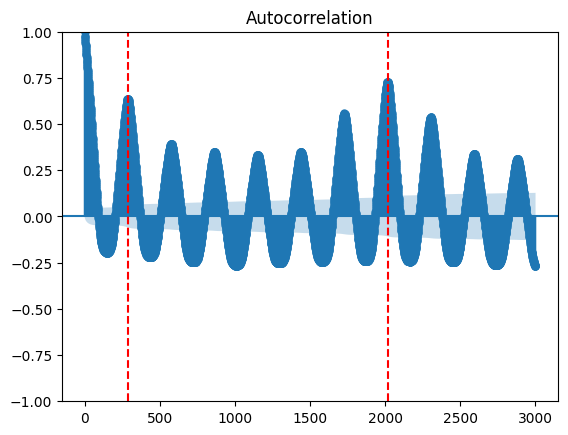

In [34]:
from statsmodels.graphics.tsaplots import plot_acf

# Daily = 288, Weekly = 2016, Yearly = 105120 for 5-min data
plot_acf(ts, lags=3000)

# add verticle line at x = 288, 2016
plt.axvline(x=288, color="red", linestyle="--")
plt.axvline(x=2016, color="red", linestyle="--")

plt.title("Autocorrelation")
plt.show()

In [38]:
daily_diff.iloc[288 : 288 + 2016]

ds
1900-01-02 00:00:00    -1.0
1900-01-02 00:05:00     0.0
1900-01-02 00:10:00    -4.0
1900-01-02 00:15:00     8.0
1900-01-02 00:20:00    -5.0
                       ... 
1900-01-08 23:35:00    34.0
1900-01-08 23:40:00    44.0
1900-01-08 23:45:00    20.0
1900-01-08 23:50:00    -5.0
1900-01-08 23:55:00    35.0
Length: 2016, dtype: float64

## seasonality check

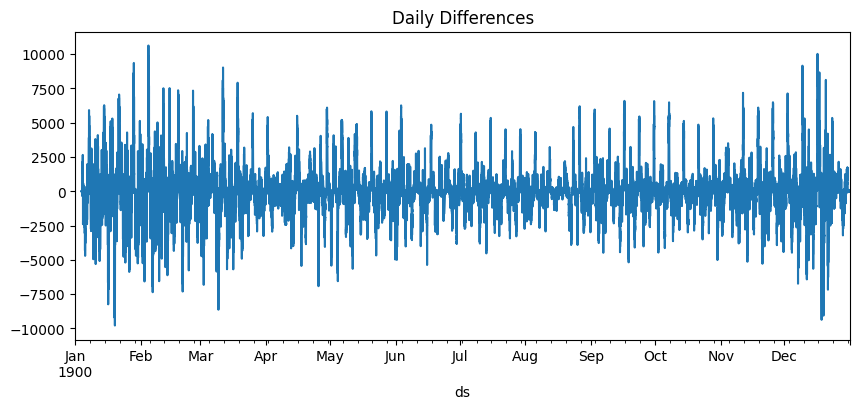

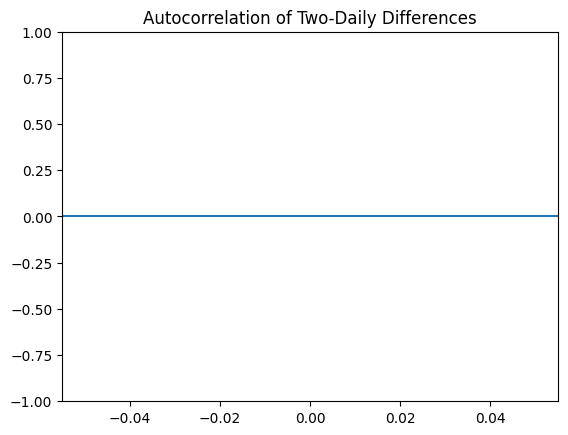

In [44]:
# please take daily differences to see if there's still significant autocorrelation

# take daily differences
daily_diff = ts.diff(periods=288)

# also take two-daily differences
two_daily_diff = daily_diff.diff(periods=288 * 2)

# # also take three-daily differences
# three_daily_diff = daily_diff.diff(periods=288*3)

# plot the daily differences
two_daily_diff.plot(figsize=(10, 4), title="Two-Daily Differences")
plt.show()

# plot the autocorrelation of the daily differences
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(two_daily_diff.iloc[288 * 2 : (12 * 24 * 365)], lags=3000)
plt.title("Autocorrelation of Two-Daily Differences")
plt.show()

# 2. Feature Engineering

# 3. Memory Optimization

# 4. Modelling

In [45]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

# time series is 5-min data, so seasonality is 288
seasonality = 288

# create a StatsForecast object
sf = StatsForecast(
    models=[AutoARIMA(season_length=seasonality)],
    freq="5min",
)

sf.fit(df_combined)
sf.predict(h=24, level=[95])

: 